<a href="https://colab.research.google.com/github/MilenaSimionee/AluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)



In [21]:
# Célula 1
loja.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Faturamento
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,219.08
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,256.35
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,279.51
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,1009.99
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,446.99


### Importação dos dados



# 2. Vendas por Categoria


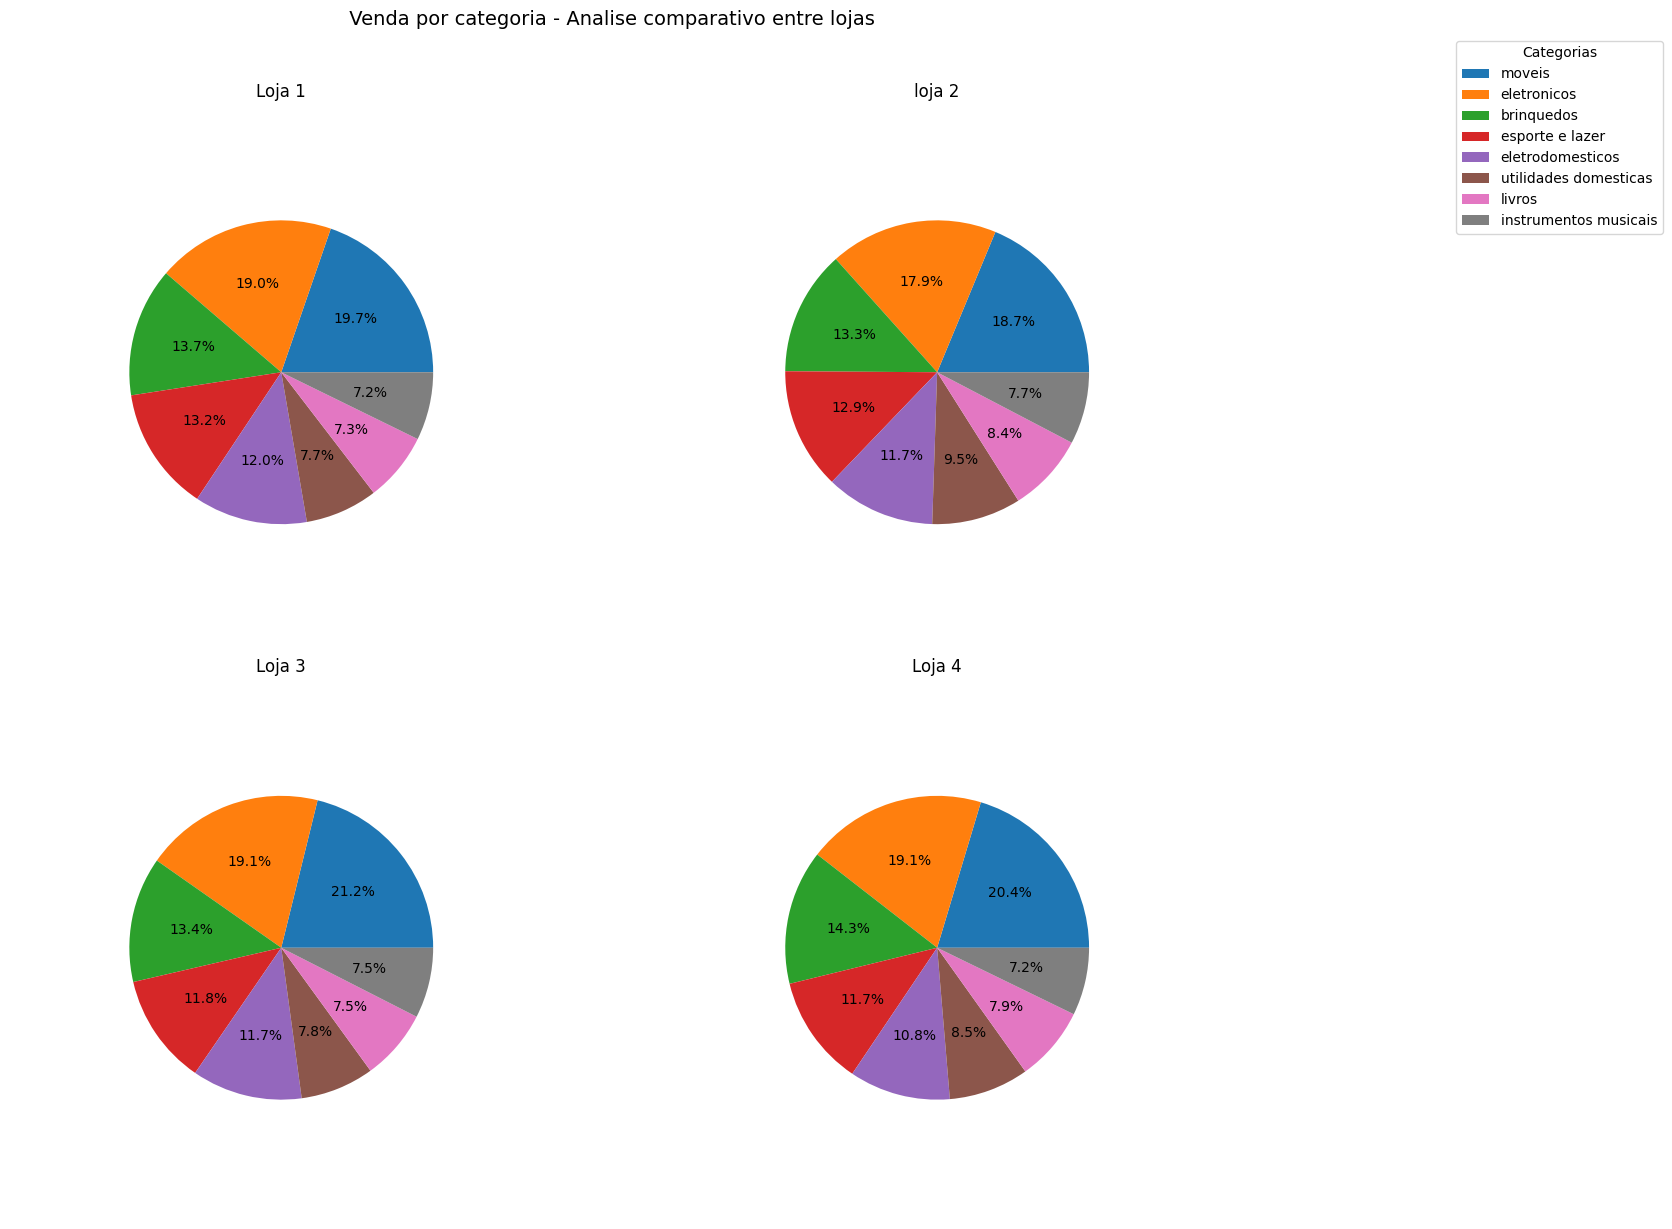

In [14]:
fig,axs = plt.subplots(2,2,figsize=(14,12))
fig.suptitle(' Venda por categoria - Analise comparativo entre lojas', fontsize=14, y=1.02)

lojas = [loja1, loja2, loja3, loja4]
titulos = ['Loja 1', 'loja 2', 'Loja 3', 'Loja 4']

categorias_unicas = set()
for loja in lojas:
    categorias_unicas.update(loja['Categoria do Produto'].unique())
categorias_unicas = list(categorias_unicas)

# Cores fixas para manter consistência (opcional)
cores_fixas = {
    'moveis': '#1f77b4',
    'eletronicos': '#ff7f0e',
    'brinquedos': '#2ca02c',
    'eletrodomesticos': '#d62728',
    'esporte e lazer': '#9467bd',
    'instrumentos musicais': '#8c564b',
    'livros': '#e377c2',
    'utilidades domesticas': '#7f7f7f'
}

#criação dos multiplos gráficos
for ax, loja, titulo in zip(axs.flat, lojas, titulos):
  categorias = loja['Categoria do Produto'].value_counts()
  ax.pie(categorias, labels=None, autopct='%1.1f%%', radius=0.7)
  ax.set_title(titulo, pad=2)


fig.legend(categorias.index, title='Categorias', loc='upper left', bbox_to_anchor=(1.1, 1))


plt.tight_layout()
plt.show()

#1. Análise do faturamento


In [19]:
#calculando o faturamneto por vendas

loja1['Faturamento'] = loja1['Preço']
loja2['Faturamento'] = loja2['Preço']
loja3['Faturamento'] = loja3['Preço']
loja4['Faturamento'] = loja4['Preço']

#calculando faturamento total por loja

soma_loja1 = loja1['Faturamento'].sum()
soma_loja2 = loja2['Faturamento'].sum()
soma_loja3 = loja3['Faturamento'].sum()
soma_loja4 = loja4['Faturamento'].sum()

#Organizando os resultados criando um dicionário

faturamento_lojas={
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'faturamento': [soma_loja1, soma_loja2, soma_loja3, soma_loja4]  # Lista de faturamento
}

df_faturamento = pd.DataFrame(faturamento_lojas)

df_faturamento['faturamento'] = df_faturamento['faturamento'].apply(lambda x:f'R$ {x:,.2f}' )

df_faturamento




,Loja,faturamento
0,Loja 1,"R$ 1,534,509.12"
1,Loja 2,"R$ 1,488,459.06"
2,Loja 3,"R$ 1,464,025.03"
3,Loja 4,"R$ 1,384,497.58"


# 3. Média de Avaliação das Lojas

Avaliação por loja:
 Loja 1 : 3.98 
 Loja 2 : 4.04 
 Loja 3 : 4.05 
 Loja 4 : 4.00 


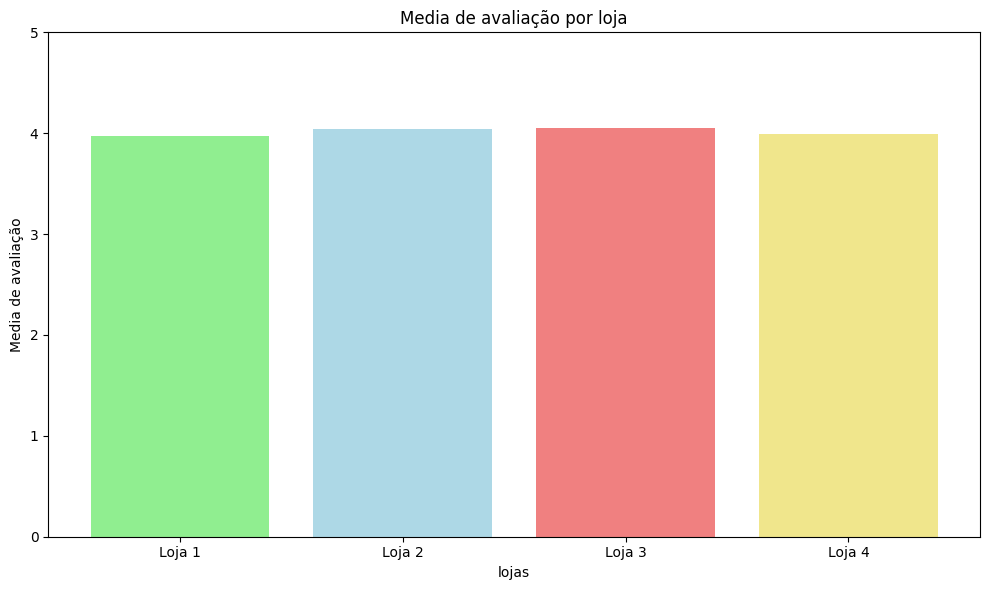

In [24]:
#calculando a avaliação de cada loja

media_avaliacao_loja1 = loja1['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

#criamos um dicionario para ter os resultados organizados

media_avaliacao= {
    'Loja 1': media_avaliacao_loja1,
    'Loja 2': media_avaliacao_loja2,
    'Loja 3': media_avaliacao_loja3,
    'Loja 4': media_avaliacao_loja4
}

print('Avaliação por loja:')
for loja, media in media_avaliacao.items():
  print(f' {loja} : {media:.2f} ')


#vizualização dos graficos

lojas = list(media_avaliacao.keys())
media = list(media_avaliacao.values())
cores = ['lightgreen', 'lightblue', 'lightcoral', 'khaki']

plt.figure(figsize=(10, 6))
plt.bar(lojas, media, color=cores)
plt.title('Media de avaliação por loja')
plt.xlabel('lojas')
plt.ylabel('Media de avaliação')
plt.ylim(0,5)
plt.tight_layout()
plt.show()





# 4. Produtos Mais e Menos Vendidos

In [ ]:
#produtos mais e menos vendidos da loja 1

produtos_contagem = loja1['Produto'].value_counts()

mais_vendidos_loja1 = produtos_contagem.head(5)
print(' 5 produtos mais vendidos loja 1')
print(mais_vendidos_loja1)

menos_vendidos_loja1 = produtos_contagem.tail(5)
print('\n 5 produtos menos vendidos loja 1')
print(menos_vendidos_loja1)






In [ ]:
#produtos mais e menos vendidos da loja 2

produtos_contagem = loja2['Produto'].value_counts()

mais_vendidos_loja2 = produtos_contagem.head(5)
print(' 5 produtos mais vendidos loja 2')
print(mais_vendidos_loja2)

menos_vendidos_loja2 = produtos_contagem.tail(5)
print('\n 5 produtos menos vendidos loja 2')
print(menos_vendidos_loja2)

#criando os graficos




In [ ]:
#produtos mais e menos vendidos da loja 3

produtos_contagem = loja3['Produto'].value_counts()

mais_vendidos_loja1 = produtos_contagem.head(5)
print(' produtos mais vendidos loja 3')
print(mais_vendidos_loja2)

menos_vendidos_loja3 = produtos_contagem.tail(5)
print('\n produtos menos vendidos loja 3')
print(menos_vendidos_loja3)



In [ ]:
#produtos mais e menos vendidos da loja 4

produtos_contagem = loja4['Produto'].value_counts()

mais_vendidos_loja4 = produtos_contagem.head(5)
print('produtos mais vendidos loja 4')
print(mais_vendidos_loja4)

menos_vendidos_loja4 = produtos_contagem.tail(5)
print('\n produtos menos vendidos loja 4')
print(menos_vendidos_loja4)



# 5. Frete Médio por Loja


     Loja  Frete
0  loja 1  34.69
1  loja 2  33.62
2  loja 3  33.07
3  loja 4  31.28


<function matplotlib.pyplot.show(close=None, block=None)>

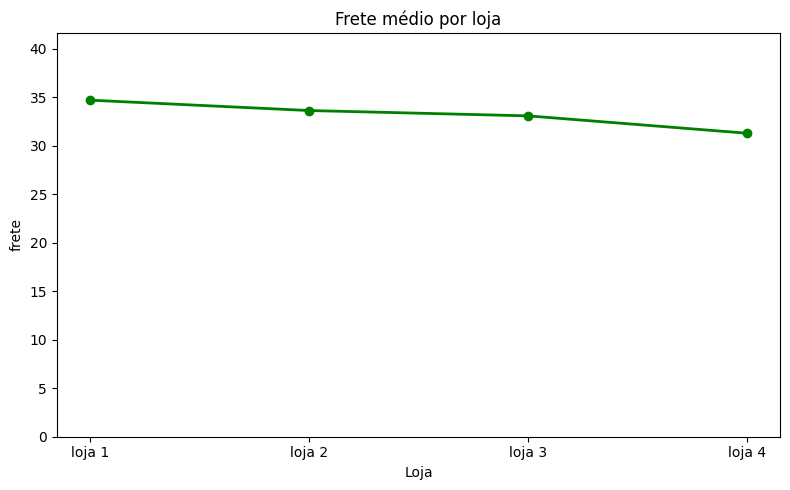

In [5]:
frete_medio = []
nomes_lojas = []

for i in range(1,5):
  loja = globals()[f'loja{i}']
  media_frete = loja['Frete'].mean()

  nomes_lojas.append(f'loja {i}')
  frete_medio.append(media_frete)

frete_medio_df = pd.DataFrame({
    'Loja': nomes_lojas,
    'Frete': frete_medio
})

frete_medio_df['Frete'] = frete_medio_df['Frete'].round(2)
print(frete_medio_df)


plt.figure(figsize=(8,5))
plt.plot(frete_medio_df['Loja'], frete_medio_df['Frete'], color='green', marker='o', linestyle='-', linewidth=2, label='Frete Médio')
plt.title('Frete médio por loja')
plt.xlabel('Loja')
plt.ylabel('frete')
plt.ylim(0, frete_medio_df['Frete'].max() * 1.2)
plt.tight_layout()
plt.show

**RELATÓRIO**




Neste relatório, apresento minha análise sobre qual das quatro lojas deve ser vendida, com base nas cinco métricas
avaliadas: faturamento, vendas por categoria, média de avaliação dos clientes, frete médio por loja e produtos mais
e menos vendidos.

Considero que o **faturamento** e a **avaliação dos clientes** são os fatores com maior peso na tomada de decisão, visto que o faturamento impacta no crescimento do négocio, menos receita menor a margem de investimento, no qual reflete em  sua estrutura e inovação.
A avaliação também é alta prioridade na ánalise, pois avaliação baixa indica insatisfação, e esse cliente tende a não voltar, deixando má reputação.
Nesse sentido, as lojas 1 e 4 se destacaram na comparação.

A **loja 4** apresentou a **menor receita** entre todas, além de uma **avaliação média de 4.0**. Já a **loja 1**,
embora com uma avaliação um pouco inferior (**3.98**), obteve um **faturamento cerca de R$150.000 superior** ao da
loja 4 — uma diferença expressiva em termos de desempenho financeiro.

A diferença entre as avaliações é pequena, e aspectos como atendimento ou logística podem ser ajustados para melhorar
a nota da loja 1. Já o baixo faturamento da loja 4 representa um ponto de atenção mais crítico.

Diante disso, **recomendo a venda da loja 4**, pois apresenta menor retorno financeiro e apenas uma leve vantagem em
avaliação, que pode ser facilmente compensada com melhorias operacionais na loja 1.
